In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='paddyleafdiseaseuci (1) - Copy.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('paddyleafdiseaseuci (1) - Copy.zip')
f.keys()
!unzip "paddyleafdiseaseuci (1) - Copy.zip"

Archive:  paddyleafdiseaseuci (1) - Copy.zip
replace paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_1602.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_1602.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_1905.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_1988.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_2019.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_2094.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_2316.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_2441.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_2659.jpg  
  inflating: paddyleafdiseaseuci (1) - Copy/test/Bacterial leaf blight/blight-_0_2829.jpg  
 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.12.0


In [ ]:
test_dataset = '/content/paddyleafdiseaseuci (1) - Copy/test'
train_dataset ="/content/paddyleafdiseaseuci (1) - Copy/train"
val_dataset ="/content/paddyleafdiseaseuci (1) - Copy/valid"

BATCH_SIZE = 20
IMG_SIZE = (224, 224)
no_classes = 3

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dataset,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 )
validation_dataset = tf.keras.utils.image_dataset_from_directory(val_dataset,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 )
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dataset,
                                                                 shuffle=True,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE)

Found 911 files belonging to 3 classes.
Found 219 files belonging to 3 classes.
Found 164 files belonging to 3 classes.


In [ ]:
class_names = train_dataset.class_names

(20, 224, 224, 3)
[2 1 1 1 0 2 1 1 1 1 0 0 1 0 2 0 0 2 1 0]


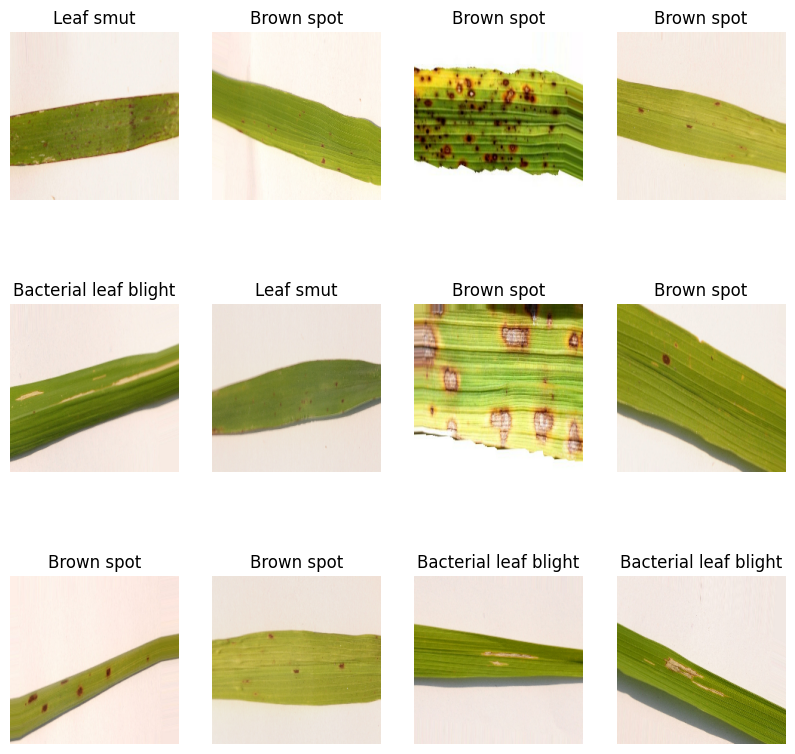

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in train_dataset.take(1):
  print (image_batch.shape)
  print (labels_batch.numpy())
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy ().astype( "uint8" ) )
    plt.title(class_names[labels_batch[i]])
    plt.axis( "off" )

In [ ]:
#from tensorflow.keras import models, layers
#import matplotlib.pyplot as plt


#resize_and_rescale = tf.keras.Sequential([
#    layers.experimental.preprocessing.Rescaling(1.0/255),
#    layers.experimental.preprocessing.Resizing (256,256)
#]
#)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential ([
    layers.experimental.preprocessing.RandomFlip( "horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
]
)


In [ ]:
base_model = keras.applications.ResNet50(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
nb_classes = 3
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D

x = base_model.layers[-2].output
x = data_augmentation(x)
#x = resize_and_rescale(x)
x = Flatten()(x)

x = Dropout(0.2)(x)
x = keras.layers.Dense(512, activation="relu")(x)

output = Dense(nb_classes, activation="softmax")(x)
model_final = Model(inputs=base_model.input, outputs=output)

In [ ]:
model_final.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
epochs = 50
history = model_final.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

Epoch 1/50
46/46 [==============================] - 61s 282ms/step - loss: 57.2548 - accuracy: 0.5192 - val_loss: 152.5595 - val_accuracy: 0.3699
Epoch 2/50
46/46 [==============================] - 13s 261ms/step - loss: 1.5589 - accuracy: 0.6926 - val_loss: 11.8762 - val_accuracy: 0.3470
Epoch 3/50
46/46 [==============================] - 13s 261ms/step - loss: 0.5810 - accuracy: 0.8452 - val_loss: 0.9444 - val_accuracy: 0.7900
Epoch 4/50
46/46 [==============================] - 14s 286ms/step - loss: 0.1895 - accuracy: 0.9583 - val_loss: 0.5131 - val_accuracy: 0.8721
Epoch 5/50
46/46 [==============================] - 13s 262ms/step - loss: 0.7294 - accuracy: 0.8606 - val_loss: 2.7294 - val_accuracy: 0.8311
Epoch 6/50
46/46 [==============================] - 13s 264ms/step - loss: 1.1715 - accuracy: 0.8211 - val_loss: 1.4318 - val_accuracy: 0.7854
Epoch 7/50
46/46 [==============================] - 13s 266ms/step - loss: 0.4344 - accuracy: 0.9265 - val_loss: 0.9473 - val_accuracy: 0.

In [ ]:
scores = model_final.evaluate(test_dataset)

9/9 [==============================] - 2s 121ms/step - loss: 0.4687 - accuracy: 0.8476


First image to predict
Actua1 Label:  Bacterial leaf blight
1/1 [==============================] - 1s 908ms/step
Predicted Label:  Leaf smut


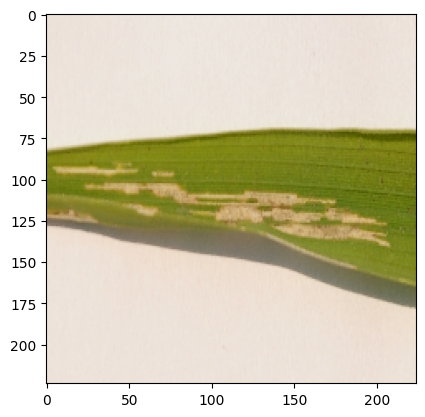

In [ ]:
for images_batch, labels_batch in test_dataset.take(1):
  first_image = images_batch[0].numpy().astype("uint8")

  print("First image to predict")
  plt.imshow (first_image)
  print("Actua1 Label: ",class_names[labels_batch[0].numpy()])

  batch_prediction = model_final.predict(image_batch)
  print("Predicted Label: " ,class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model_final.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


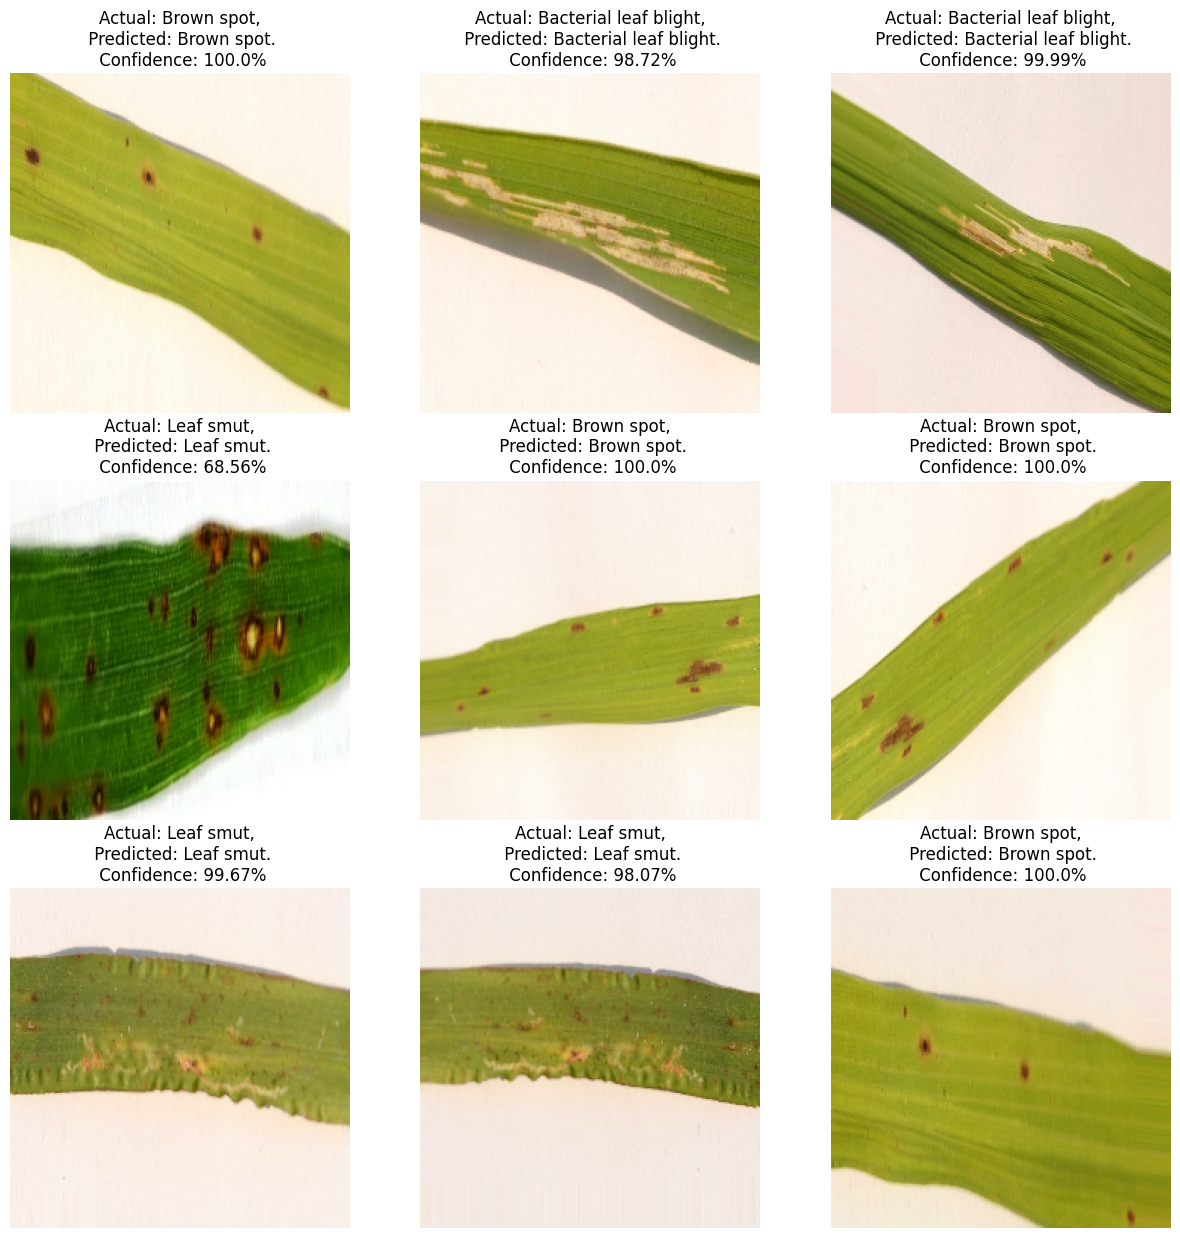

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model_final, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
image_to_predict = [
    "/content/cochliobolus.jpg",
    "/content/5390515.jpg",
    "/content/bbb.png"
    ]

for imgi in image_to_predict:
  img = keras.utils.load_img(imgi, target_size=(224,224))
  ix = keras.utils.img_to_array(img)
  ix = np.expand_dims(ix, axis=0)
  prediction = model_final.predict(ix)
  cls = tf.argmax(prediction[0], axis=-1)
  print(prediction, cls)
  print(f'{class_names[cls]} --> {imgi}')

1/1 [==============================] - 0s 24ms/step
[[5.2884372e-09 1.0000000e+00 1.2553377e-13]] tf.Tensor(1, shape=(), dtype=int64)
Brown spot --> /content/cochliobolus.jpg
1/1 [==============================] - 0s 22ms/step
[[8.9783665e-05 9.9979609e-01 1.1420815e-04]] tf.Tensor(1, shape=(), dtype=int64)
Brown spot --> /content/5390515.jpg
1/1 [==============================] - 0s 28ms/step
[[4.1598705e-05 2.1885552e-02 9.7807282e-01]] tf.Tensor(2, shape=(), dtype=int64)
Leaf smut --> /content/bbb.png
